<a href="https://colab.research.google.com/github/kooll/25t2/blob/main/book/ch02_lines_as_cells.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第2章 コードパフォーマンスの分析

第１章で、良いコードを書くためのいくつかの側面を紹介しましたが、この章ではそのうちの一つ、パフォーマンスについて深掘りしていきます。もし、あなたが大規模なシステムの一部としてコードを書いているなら、コードのパフォーマンスは非常に重要です。コードはタイムリーに出力を返し、利用可能なコンピューティングリソースを超えてはなりません。

まず最初に、最も重要なことは、コードが正しく動作することです。この章や次の章のテクニックを適用する前に、コードが必要な問題を解決し、期待される出力を返すことを確認してください。どんな最適化や速度向上も、コードがすでに正しく動いてから行うべきです。

次に、パフォーマンスの向上が必要かどうかを確認してください。あなたのコードがインターフェースしているより大きなシステムの期待を知る必要があります。あなたのコードは特定の時間内に結果を返す必要がありますか？ユーザーはあなたのコードの結果に基づいて何か行動を起こすのを待っていますか？もしそうであれば、動作が速いほどユーザーの体験は良くなります。

たとえば、機械学習モデルが予測を100ミリ秒以内に返す必要がある場合、予測結果をユーザーに表示することができます。もしあなたのコードが既に許容されている時間内に結果を返しているのであれば、そのパフォーマンスを最適化するために時間を費やす必要はないかもしれません。

しかし、この章の原則を理解しておくことは非常に良い考えです。急いで何かを組み合わせなければならない場合などに、非効率的なコードを書いているときに気づけることは役立ちます。そして後で戻って最適化することができます。コードに最も効率的なデータ構造を選ぶ方法について第３章で取り上げます。

データサイエンティストとして、測定する内容が重要であるという考えに精通していることでしょう。コードのパフォーマンスを向上させるための第一歩は、その中でどの部分が最も遅いか、または最もメモリを消費しているかを見つけることです。このデータを収集することで、これらの遅いまたはメモリを多く使う部分が修正可能なものかどうかがわかります。速度低下の原因は、コードの非効率性から来ているかもしれませんし、既に可能な限り効率的になっているかもしれませんが、

これがどちらのケースであるかを知るためには、データが必要です。「コードの時間計測」と「コードのプロファイリング」で、コードの性能を測定する方法について説明します。

## 早すぎる最適化

...プログラミングにおいて、早すぎる最適化はすべての問題（あるいはそのほとんど）の根源である。

—ドナルド・クヌース、『コンピュータープログラミングの技法』

このドナルド・クヌースの引用は、ソフトウェアエンジニアリングの世界でしばしば繰り返される古典的なフレーズです。データサイエンスの世界で他の多くのものが悪とされることもありますが、これは依然として有用なアドバイスです。私はこれを、コードの時間やメモリの要件がわかる前に、またどこにボトルネックがあるのかを知る前に、コードを最適化しないようにという勧めとして解釈しています。

## パフォーマンスを向上させる方法

ここでは、コードが使用するコンピュータリソースを最小限に抑えることを良好なパフォーマンスと定義します。コンピュータアーキテクチャの詳細については触れませんが、これは非常に大きなトピックです。ただし、異なるコードがタスクの完了にかかる時間や必要なコンピュータメモリの量に及ぼす影響を測定することはできます。したがって、パフォーマンスの高いコードとは、より高速であるか、またはより小さなメモリフットプリントを持つコードを意味しますが、多くの場合、より高速なコードはより多くのメモリを使用するというトレードオフがあります。

コードのパフォーマンスを向上させる方法の選択は、使用しているプログラミング言語や他の要因に依存します。Pythonでは、主に次の選択肢があります。

### アルゴリズムの選択

コードを書く際の選択は、そのパフォーマンスに大きな違いをもたらすことがあります。例えば、可能であればネストされたループを避け、リストを一度だけ反復処理すれば済む場合に二度反復処理しないようにしましょう。

### データ構造の選択

達成すべきタスクによって、さまざまなデータ構造は異なるトレードオフを持つことがあります。例えば、より迅速に行うことができる場合があります。

辞書から値を見つけることは、リストを検索するよりも効率的です。これについては、詳細に説明します。

### 組み込み関数の使用

問題を解決するための組み込み関数が存在する場合、その関数を使用する方が自分で書くよりもほとんどの場合効率的です。これらの組み込み関数の多くはC言語で実装されており、一般的に同じ機能をPythonで再作成するよりも高速です。

### Pythonのコンパイル

Pythonのコードをより低レベルの言語にコンパイルすることで、実行速度を速くすることができるかもしれません。そのためのツールとしては、Numba、Cython、およびPyPyがあります。どれを使用するかは、あなたのユースケースに依存します。NumbaはPythonのサブセットを含み、CythonはPythonのスーパーセットで、Cの追加オプションがあります。PyPyはPythonをジャストインタイムコンパイルを使用して再実装したものです。

### 非同期コード

コードを最適化するためには、他の処理を待っている間にタスクを遂行させることができます。例えば、遅いネットワーク越しにAPIの応答を待っている場合などです。

### 並列処理と分散処理

並列処理とは、コンピュータ内で複数のプロセッサを使用してコードを実行することを意味します。
multiprocessing モジュールを使用して、一度に複数のプロセッサ上でコードを実行することができます。

分散処理とは、複数の異なるマシンで同時にコードを実行することを意味します。

この本では、新しいツールや技術を多く学ぶ時間を取らずに、日常的に書くコードを改善するためにできることに焦点を当てます。したがって、上記のリストからすべての選択肢を網羅することはありません。この章では、パフォーマンスを測定する方法とアルゴリズムの選び方に集中します。コードのパフォーマンスを測定する方法を知ることで、組み込み関数がどのように改善をもたらすかを理解できるようになります。また、ユースケースに最適なデータ構造の選び方についても第３章で説明します。そして、並列および分散コンピューティングについても簡単に触れます。

コードのパフォーマンスについて深く掘り下げたいのであれば、Micha GorelickとIan Osvaldによる「High Performance Python: Practical Performant Programming for Humans」を強くお勧めします（O'Reilly出版）。

この本では、Pythonのさまざまなコンパイラに関する詳細な情報も含まれています。
また、非同期コードについて、私のお気に入りの説明もあります。

## コードの実行時間を計測する方法

コードのどの部分が遅いかを見つける最も簡単な方法は、関数やコード行の実行時間を測定し、変更を加えた後、再度測定することです。一度に一つずつの変更を行うのが良い慣習です。そうしないと、どの変更が高速化や低速化を引き起こしたのかがわからなくなります。

この章では、いくつかの簡単な統計関数の例を使用しています。このコードを実際に使用することはお勧めしていません。実際にstatistics や NumPy パッケージの一部として使用可能ですが、実行時間の違いをわかりやすくするための例であり、実際に使うべき例ではありません。

次の例は、リスト内の数値の統計的な最頻値（モード）を計算する簡単なコードを示しています。この例を使って、コードの実行時間を測定する方法を見てみましょう。

In [ ]:
def slow_way_to_calculate_mode(list_of_numbers):
    result_dict = {}
    for i in list_of_numbers:
        if i not in result_dict:
            result_dict[i] = 1
        else:
            result_dict[i] += 1

    mode_vals = []
    max_frequency = max(result_dict.values())
    for key, value in result_dict.items():
        if value == max_frequency:
            mode_vals.append(key)

    return mode_vals

次に、この関数に入力するために、100,000個のランダムな整数のリストを生成しましょう。

In [ ]:
import numpy as np

random_integers = np.random.randint(1, 1_000_000, 1_000_000)


この関数が実行されるのにどれくらい時間がかかるかを測定する最も簡単な方法は、

モジュールを使用している間に、コンピューターの時計で時間を記録することができます。

関数を実行する前と後で、その差分を出力してください。

In [ ]:
import time

start = time.time()
slow_way_to_calculate_mode(random_integers)
end = time.time()

print(end-start)

0.7923450469970703


ただし、関数の実行時間は変動する可能性があるため、十分に信頼性のある結果を得るにはこれを複数回測定することが重要です。Jupyter Notebookを使用している場合、複数回測定する便利なセルマジックコマンドがあります。

In [ ]:
%%timeit
slow_way_to_calculate_mode(random_integers)

947 ms ± 196 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


上記の例では、10回の繰り返しを7回実行し、それらの要約統計を表示しています。

timeit は、繰り返しの回数と実行の回数を、全体で2秒で収まるように設定します。
-r フラッグを使うと実行回数を、-n フラッグを使うと繰り返しの回数を指定できます。

ノートブックではなく、通常のPythonスクリプトを使用している場合、次の例のようにtimeit を利用できます：

```python
import numpy as np
import timeit

random_integers = np.random.randint(1, 100_000, 1000)


def slow_way_to_calculate_mode(list_of_numbers):
    result_dict = {}
    for i in list_of_numbers:
        if i not in result_dict:
            result_dict[i] = 1
        else:
            result_dict[i] += 1
    mode = max(result_dict, key=result_dict.get)
    if result_dict[mode] == 1:
        return min(list_of_numbers)
    else:
        return mode


mode_timer = timeit.Timer(
    stmt="slow_way_to_calculate_mode(random_integers)",
    setup="from __main__ import slow_way_to_calculate_mode, random_integers",
)

time_taken = mode_timer.timeit(number=10)

print(f"Execution time: {time_taken} seconds")
```

しかし、このコードは良いものなのでしょうか？267ミリ秒は速いのでしょうか、それとも遅いのでしょうか？これは速度に関する実際の要件がない例に過ぎないので、別の方法でモードを計算して、パフォーマンスが向上するかどうか比較してみます。こちらは同じ計算を実行する別の方法です。

In [ ]:
from collections import Counter

def mode_using_counter(list_of_numbers):
    c = Counter(list_of_numbers)
    return c.most_common(1)[0][0]

再び、実行するのにどれくらい時間がかかるかを測定するために使用して:

In [ ]:
%%timeit
mode_using_counter(random_integers)

680 ms ± 85.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


ご覧の通り、このバージョンのコードは実行にかかる時間がかなり短縮されています。平均でおよそ267ミリ秒だったところが、約23ミリ秒で済んでいます。標準偏差もかなり低くなっており、これにより実行時間の上限を保証する助けとなっています。

この例から2つのポイントを取ることができます。第一に、異なるコードがまったく同じ機能を実行することができますが、あるバージョンは他のバージョンよりもはるかに高速である可能性があります。

第二点は、組み込み関数を使用する（この場合、

collectionsモジュールの Counter) と、自分で書くよりもはるかに高速なことが多いことです。

collections や itertools モジュールには、一般的な機能を高速化するのに役立つ関数が多く含まれています。

## コードのプロファイリング

コード実行時間の計測は、単一行のコードに対しては有効ですが、もし…

長い関数やスクリプト全体がある場合、各行を個別のノートブックセルに分けて個別にタイミングを計るのは面倒です。ここで役立つのがプロファイラーです。プロファイラーを使えば、関数のどの部分が最も時間がかかるかを知ることができるうえ、さらなる詳細情報を提供してくれるので、コードのボトルネックを見つけやすくなります。また、このセクションでは、コードのメモリ使用量をプロファイリングする方法の詳細も説明します。

### cProfile

Pythonの組み込みプロファイラ cProfileは、長いスクリプト内のボトルネックの位置を基本的に把握するために使用できます。この例では、前のセクションのmode 関数内に乱数ジェネレータを配置して、プロファイラで確認できる内容を増やします。

In [ ]:
import numpy as np
from collections import Counter

def mode_using_counter(n_integers):
    random_integers = np.random.randint(1, 100_000, n_integers)
    c = Counter(random_integers)
    return c.most_common(1)[0][0]

プロファイラを実行するには、次のコマンドを使用します:

In [ ]:
%%prun
mode_using_counter(10_000_000)

出力例は次のようになるでしょう:

ランダムな数字のリストを作成しました。他のすべてのステップは非常に少ない時間を要しました。

(このあたりの訳は、省略）

cProfile の欠点は、使用した関数と出力の対応関係がつけにくいことです。

一方、SnakeVizパッケージを使用して、cProfileの結果をグラフィカルに表示することもできます。

以下のコマンドでSnakeVizをインストールできます:

In [ ]:
!pip install snakeviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.5/183.5 kB 4.0 MB/s eta 0:00:00


それでは、Jupyter Notebookで作業している場合、SnakeViz拡張機能を使用できます。以下のコマンドで拡張機能をロードすることができます：

In [ ]:
%load_ext snakeviz

その後、次のコマンドでSnakeVizを実行できます:

In [ ]:
%%snakeviz
mode_using_counter(10_000_000)

 
*** Profile stats marshalled to file '/tmp/tmps0fx4dhl'. 
Opening SnakeViz in a new tab...


これにより、図2-1に示されている結果が得られます。(訳註、Jupyternotebook 上では得られません）


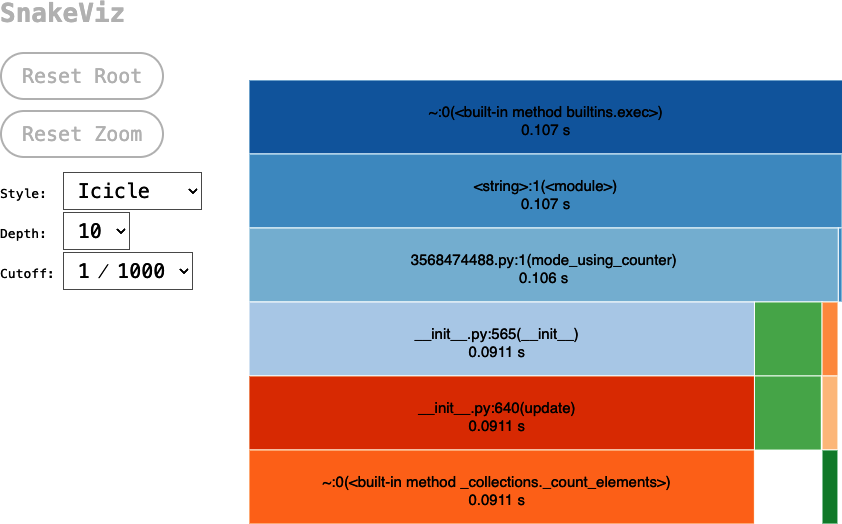

図2-1. SnakeVizで出力を視覚化する

これは、cProfileのデフォルト出力よりも解釈しやすい場合があります。

## line_profiler

`line_profiler`は、Pythonのコードの各行の実行にかかる時間をプロファイルするためのツールです。どの部分のコードが最も時間を消費しているかについて詳しい洞察を提供し、性能の最適化に役立ちます。

コンピュータが時間をどのように使っているかについて、Pythonの内部動作の詳細を含む詳細な内訳を提供します。しかし、その出力は特に読みやすいわけではなく、Pythonにあまりにも深く入り込みすぎることがあります。

コードによって呼び出される組み込みメソッド。パッケージはコードのより読みやすい内訳を提供します。

デフォルトではインストールされていないため、次のコマンドを使用してインストールできます:

In [ ]:
!pip install line_profiler

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.2/750.2 kB 17.5 MB/s eta 0:00:00


次に、Jupyter Notebookでこれを別の拡張機能としてロードする必要があります。

In [ ]:
%load_ext line_profiler

どの関数を確認するかを明示的に指定する必要があります-

In [ ]:
%lprun -f mode_using_counter mode_using_counter(10000000)

フラグを設定して、このコマンドを使用して関数を実行することができます。

これは関数の出力です：

タイマー単位：1e-09秒（ナノ秒）

合計時間: 2.60904秒 ファイル: .../3744758285.py

申し訳ありませんが、その関数の具体的な内容やコンテキストが提示されていないため、詳細な説明はできません。しかし、一般的に「mode\_using\_counter」という関数名から推測するに、この関数はPythonの`collections.Counter`を使用して、与えられたデータセットの最頻値（モード）を求める機能を持っている可能性があります。

以下は、`collections.Counter`を用いてモードを計算するサンプルコードです：

このコード例では、`collections.Counter`を使用して各要素の出現回数をカウントし、その中で最も頻繁に出現する要素（モード）を求めています。

行番号 # ヒット数 ヒットごとの時間 % 時間 行内容

申し訳ありませんが、そのテキストを翻訳することができません。何か他にお手伝いできることがあれば教えてください。

(n\_integers)：

この出力は、cProfileの出力よりもずっと読みやすいです。この関数では、時間の約5%がランダムな数字のリストを生成することに費やされ、95%がそれらをカウントすることに費やされていることが明確にわかります。

組み込み関数。このことは、もしあなたが実装したいのであれば、それを示します。

この関数のパフォーマンスを証明する際には、Counterを含む行に注目すべきです。特に、長い関数やスクリプトにおいては、最も時間がかかる行を特定することが重要です。

スクリプトでデコレーターを使用して識別することもできます。

プロファイルしたい関数を特定し、詳細については以下をご確認ください。

申し訳ありませんが、その文は不完全なようです。「これを～でどうやって行うか」という情報があると、より正確に翻訳できます。もし内容を詳しくお教えいただければ、お手伝いいたします。

## Memrayを用いたメモリプロファイリング

コードのメモリ使用量と実行時間をプロファイルできます。メモリ使用量は、コードの要件に応じて最適化が必要な場合もあります。データのサイズが増加するにつれて、使用しているハードウェアの上限に達する場合があるため、これを考慮することが重要です。さらに、CPUはメモリ管理に多くの労力を要します。CPUがコードの実行ではなくメモリ管理に過剰に時間を費やしている場合、コードの実行時間が増加する可能性があります。

これは、あなたのコードのメモリ使用量に関するさまざまなレポートを提供できる、ブルームバーグによって開発されたメモリプロファイリングツールです。Memrayをインストールするには、次のコマンドを使用します。

In [ ]:
!pip install memray

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 73.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 688.7/688.7 kB 43.2 MB/s eta 0:00:00


MemrayをスタンドアロンのPythonスクリプトで使用する方法を見てみましょう。

In [ ]:
import numpy as np
from collections import Counter

def mode_using_counter(n_integers):
    random_integers = np.random.randint(1, 100_000, n_integers)
    c = Counter(random_integers)
    return c.most_common(1)[0][0]

if __name__ == '__main__':
    print(mode_using_counter(10_000_000))

77081


スクリプトのメモリ使用量に関するデータを収集するには、次のコマンドを使用してMemrayを実行する必要があります。

In [ ]:
!memray run mode_using_counter.py

Writing profile results into memray-mode_using_counter.py.24052.bin
Memray WARNING: Correcting symbol for malloc from 0x421540 to 0x10bc0df860a0
Memray WARNING: Correcting symbol for free from 0x4219c0 to 0x10bc0df863e0
19867
[memray] Successfully generated profile results.

You can now generate reports from the stored allocation records.
Some example commands to generate reports:

/usr/bin/python3 -m memray flamegraph memray-mode_using_counter.py.24052.bin


この出力を見るべきです：

In [ ]:
!/usr/bin/python3 -m memray flamegraph memray-mode_using_counter.py.24052.bin

  Calculating high watermark... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00
  Processing allocation records... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00
Wrote memray-flamegraph-mode_using_counter.py.24052.html


プロファイル結果を memray-mode_using_counter.py.17881.bin 26008 に書き込んでいます。

[memray] プロファイル結果の生成に成功しました。

保存された割り当て記録からレポートを生成できるようになりました。

Memrayは結果を含むバイナリファイル（.bin）を生成しました。これから、このバイナリファイルを使ってさまざまなレポートを生成するための他のコマンドを実行することができます。

Memrayによって生成されたファイル名に、memray-mode\_using\_counter.py.17881.binを置き換える必要があります。これによりHTMLファイルが生成され、それを開くと図2-2のようなものが表示されるはずです。

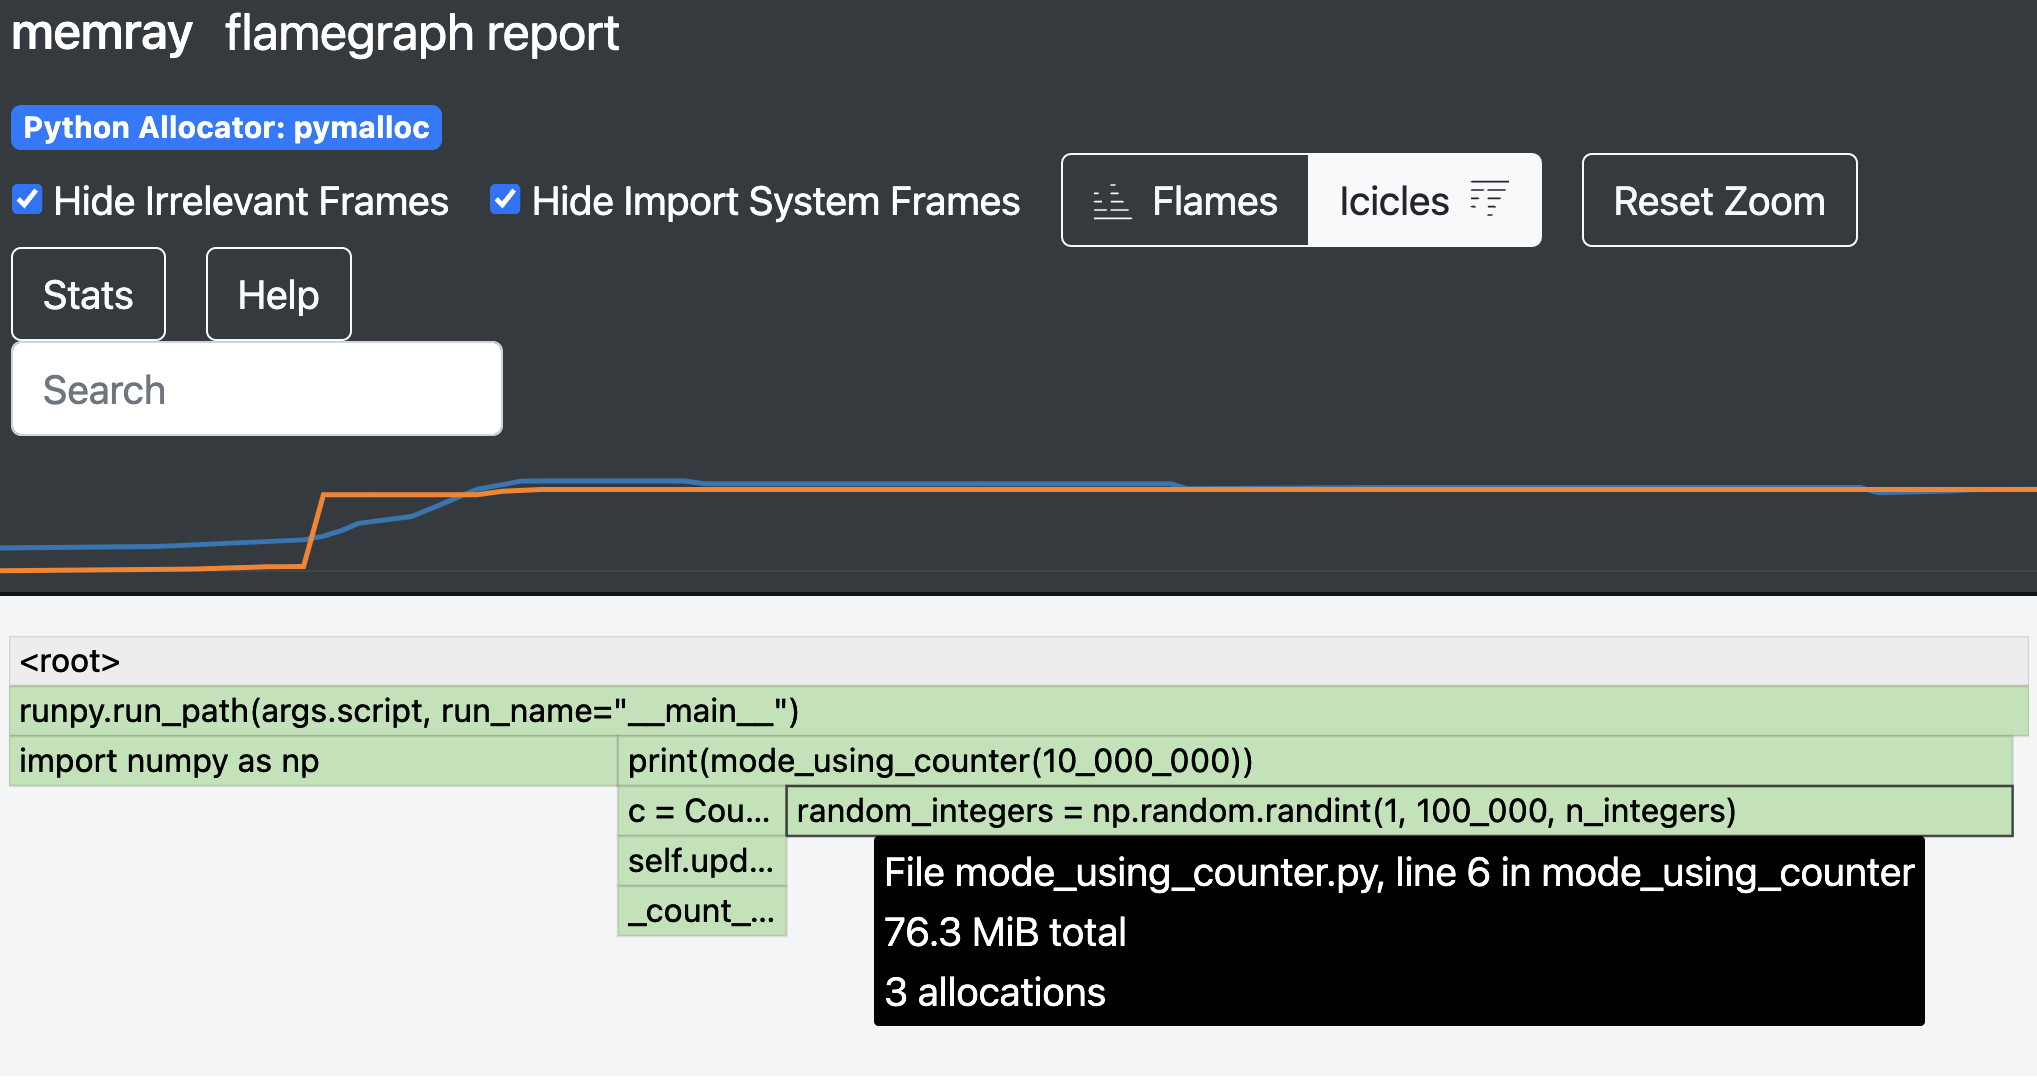

図2-2. Memrayからのフレームグラフレポート

各コード行のメモリ使用量を確認できます。この例では、最も高い使用量は`random_integers = np.random.randint(1, 100_000, n_integers)`という行で、メモリ使用量は76.3 MBでした。これは単純な例ですが、スクリプトが長くなるとこのツールは非常に役立ち、メモリ使用量が最も高いコード行を特定できます。これにより、スクリプトのメモリ使用量を最適化する必要がある場合に、どこに注力すべきかを把握することができます。

JupyterノートブックでMemrayを使うこともできます。

どの方法を使ってコードのパフォーマンスを測定するにせよ、“パフォーマンスを向上させる方法”で説明されている方法を使用してコードを最適化する前にこれを行うことが重要です。そうすることで、どこがボトルネックになっているかを把握でき、正しい箇所に努力を集中させることができます。

## 時間計算量

前のセクションでは、コード内のボトルネックを見つける方法について紹介しました。これにより、現在のデータ量に対するコードのパフォーマンスがわかりますが、将来的にデータ量が増加すると予想される場合はどうなるでしょうか。また、コードの一部が実行に非常に長い時間がかかり、測定が現実的でない場合はどうすれば良いでしょうか。ここで役立つのが、時間計算量の概念です。

時間計算量は、入力のサイズが増加するにつれてアルゴリズムの実行時間がどのように増加するかを記述します。これは、特定のハードウェアに依存しない全体的な傾向を意味します。これをより具体的に考えてみましょう。あなたのコードを数値のリストで実行し、そのリストの長さを2倍にした場合、

コードの実行時間はどうなるのでしょうか？変わらないのでしょうか、それとも倍になるのでしょうか、それとも何か別のことが起こるのでしょうか？

### 時間計算量を見積もる方法

こちらが例です。この関数は加重平均(weighted mean)を計算します。入力として数値のリストと、それらの数値に適用する重みのリストを受け取ります。

In [ ]:
def weighted_mean(list_of_numbers, weights):
    running_total = 0
    for i in range(len(list_of_numbers)):
        running_total += (list_of_numbers[i] * weights[i])
    return (running_total/sum(weights))

長さが2倍になると、for ループの繰り返し回数も倍増します。

この関数の他の行（総合計の初期化やリストの長さでの割り算）は、実行時間を増加させません。これを、この関数での手順数に関するコードの実行時間の方程式として考えることができます。各ステップはコードによって実行される何らかの操作です。総合計の初期化は1つのステップ、総合計に加算されるたびに別のステップを構成し、結果を返すことももう一つのステップです。この方程式は次のようになります。

number\_of\_steps = n + 2

n は、入力リストの長さです。

したがって、nが増加すると、ステップ数は線形に増加しますが、2は一定のままです。

増加すると、ステップ数は線形に増加しますが、2

以下の関数は、2つのリストを入力として受け取り、それらの共分散を計算します（これは2つの確率変数間の相関の強さの尺度です）。再度言いますが、これは最良の計算方法ではありません。この関数はあくまでポイントを示すためのものです。

In [ ]:
def covariance(X, Y):
    cov_sum = 0
    for i in range(len(X)):
        for j in range(len(Y)):
            cov_sum += 0.5 * (X[i] - X[j]) * (Y[i] - Y[j])
    return cov_sum / (len(X) ** 2)

この中には2つの入れ子になった（1つがもう1つの内部にある）ループがあるため、

関数、両方のサイズが

ステップ数を2倍にする。

結果が4倍に増加するように計算します。

両方同じでなければなりません。

この関数における長さ。このコードの実行時間は、データセットのサイズが増加するにつれて、その増加の2乗に比例して増加します。

これはコードを改善する方法を示唆しています。: もし、同じ計算をより迅速に行う方法があるとしたらどうでしょうか？以下の関数を考えてみてください。

In [ ]:
def covariance_fast(X, Y):
    avg_X = sum(X) / len(X)
    avg_Y = sum(Y) / len(Y)

    result = 0
    for i in range(len(X)):
        result += (X[i] - avg_X) * (Y[i] - avg_Y)

    return result / len(X)

また、共分散を計算しますが、1つのループしか使用しません:

ここで付け加えたい点は、「Timing Your Code」と「Profiling Your Code」で紹介されたタイミングとプロファイリングの手法です。

ネストループが最も時間を要したとも教えてくれるでしょう。

関数の一部を意味します。したがって、より効率的なアルゴリズムを探すには最適な場所です。

## ビッグオー(Big O)記法

ビッグオーはデータが増加するにつれてコードの動作がどのように遅くなるかを示すものです。

—ネッド・バチェルダー、PyCon 2018

ビッグO記法は、データのサイズが増加するにつれてコードの実行時間がどのように変化するかをより形式的に説明する方法です。前のセクションで紹介したように、この場合のOは関数のオーダーを指し、関数の成長率を示す別の方法です。これはデータセットのサイズが大きくなるにつれてアルゴリズムがどのように振る舞うかに応じて、アルゴリズムを異なるクラスに分類する便利な方法です。また、この分析は使用しているハードウェアに依存しません。より強力なマシンでは関数が非常に速く実行されるかもしれませんが、より性能の低いマシンでは遅くなるかもしれません。この分析により、どのマシンで実行してもコードの性能を予測することが可能です。

ビッグO記法は、前のセクションの重み付き平均の例におけるステップ数の方程式に似ていますが、係数は省略されています。ビッグO記法では、実行時間は入力のサイズnの関数として記述され、O(f(n))と書かれます。f(n)は、アルゴリズムが行う操作の数に対する上限を、関数として表したものです。

n. したがって、加重平均の例は O(n) に分類されます。

加重平均の例が O(n) である理由について疑問に思うかもしれませんが、なぜそうなのかと言いますと、

O(n + 2)を考えると、その式は以下のように示されます。

この式において、nが大きくなるにつれてBig O記法はこの式の極限を考えます。この時点では、追加の2ステップは重要ではありません。これは異なるアプローチを比較するのに役立つ近似であり、コードの実行時間を正確に測るものではありません。同様に、コードがn² + nステップで実行される場合は、これをO(n²)と近似します。

ビッグオー記法における一般的なクラスには以下のものがあります。

$O(1)$

これは「定数時間」としても知られ、実行時間がデータセットのサイズに依存しないことを意味します。この例としては、リスト内の特定の要素を調べることが挙げられます。リストの最後の要素を返すには、リストが非常に大きくても同じ時間を要します。

$O(n)$

これは「線形時間」としても知られており、データセットのサイズに応じて実行時間が線形に増加することを意味します。加重平均の例で示されている通りです。

$ O(n^2) $

これは「二乗時間」とも呼ばれ、データセットのサイズの二乗に比例して実行時間が増加することを意味します。これは、遅い共分散の例で示されています。

これらの3つのクラスは、指数時間O(2^n)、対数時間O(log n)、およびO(n log n)とともに、図2-3にプロットされています。指数時間とは、実行時間がデータセットのサイズに対して2のべき乗に比例して増加することを意味し、再帰アルゴリズムではしばしばO(2^n)の時間計算量を持ちます。対数時間とは、実行時間がデータセットのサイズの対数に比例して増加することを意味し、多くの検索アルゴリズムがこの時間計算量を持ちます。

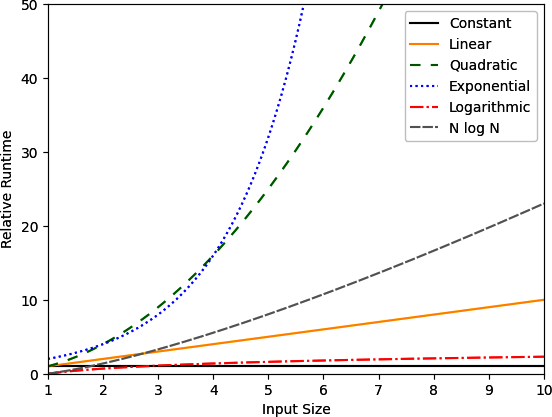

図2-3. 入力サイズに対する相対的なランタイム

プロットからわかるように、O(n) と O(2) は非常に急速に遅くなります。

そのため、コードのパフォーマンスを向上させる必要がある場合は、これらを避けるようにしてください。

あなたのユースケースにおいて、現実的なnの範囲を考慮することも重要です。例えば、nが5を超えることがない場合、コードの実行時間が線形に増加しようと指数的に増加しようと、あまり問題にはなりません。

次の章で異なるデータ構造を選択する際にビッグO記法が非常に役立つ例を見ることになります。

## 重要なポイント

コードのパフォーマンスを検討する際には、最初にいつ最適化が適切かを理解する必要があります。データ量が少ない場合や、コードがすでにすべての要件を満たしている場合は、最適化に時間をかけるべきではありません。

しかし、コードのパフォーマンスを改善する必要がある場合、最初のステップはそれを計測して、どこにボトルネックがあるかを見つけることです。その最も簡単な方法は、関数やコードの行が実行されるのにどれくらいの時間がかかるかを計測することです。さらに詳細が必要な場合や、より長いスクリプトの時間分布を知りたい場合は、プロファイラを使用してください。

また、コードが実行するステップの数を考えることと、データ量が増えるにつれてそれがどのようにスケールするかを考えることも有益です。これを説明するためにビッグO記法が使われることがよくあります。全体的に言えば、覚えておくべきことは、

同じコードを書くための多くの選択肢があり、その中には他よりもパフォーマンスが良いものもあります！